<a href="https://colab.research.google.com/github/rogersm92/Machine_Learning/blob/main/Data_Science_House_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Regression with Python

In [148]:
# basic imports for this Jupyter Notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [149]:
training_filepath = "/content/sample_data/train_housing.csv"
testing_filepath = "/content/sample_data/test_housing.csv"

train_dataframe = pd.read_csv(training_filepath)
testing_dataframe = pd.read_csv(testing_filepath)

train_dataframe.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [150]:
train_dataframe.describe() # this method generates descriptive statistics. Descriptive statistics include those that summarize the central tendency.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [151]:
train_dataframe["SalePrice"].head() # We have to select the Sales Price as the Output or Target variable
# print(train_dataframe["SalePrice"][:5]) # this provides the same output

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [152]:
train_dataframe["SalePrice"].describe() # We can also use .describe() method on single columns or series. Just remember that a Column or Feature/Target is also a panda's Series.
# A column is called feature when is chosen to predict something. A column is called target when is the output of our predictions.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [153]:
testing_dataframe.columns # We can see that the column SalePrice is not included in the testing dataframe, because we have to predict that column or output

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

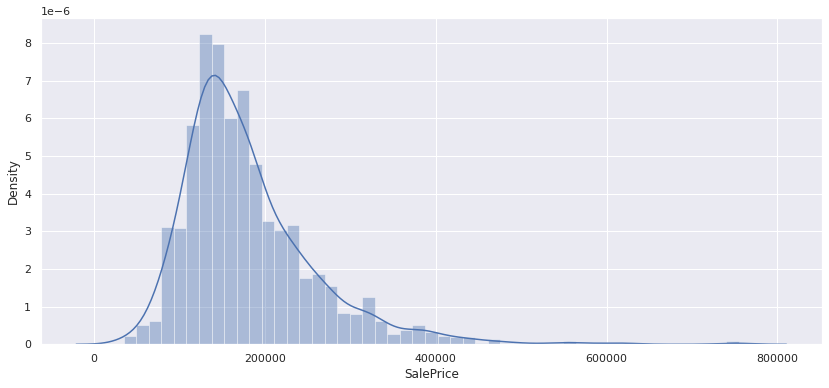

In [154]:
#histogram
plt.figure(figsize=(14,6))
sns.distplot(train_dataframe['SalePrice']); # Thanks to this histogram we can see that most sales prices go between 100k-400k USD$

In [155]:
saleprice = train_dataframe["SalePrice"]
minimum_price_value = min(saleprice)
minimum_price_text = "If we check the histogram from above, we can see that {} corresponds to the first bar in the graph."
print(minimum_price_text.format(minimum_price_value))

If we check the histogram from above, we can see that 34900 corresponds to the first bar in the graph.


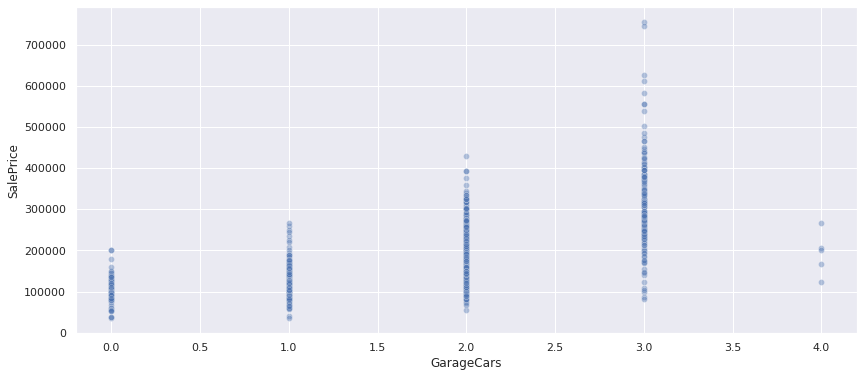

In [156]:
#scatter plot GarageCars/SalePrice
plt.figure(figsize=(14,6))

feature_garage_cars = "GarageCars"
target = "SalePrice"

sns.scatterplot(x=train_dataframe[feature_garage_cars], y=train_dataframe[target], alpha=0.4) # With alpha we can see where most points tend to group
# This is fine, but this may work better with a bar plot

Text(0, 0.5, 'Price of a house')

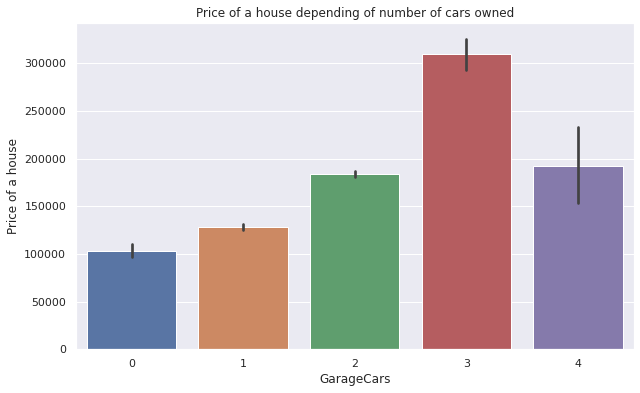

In [157]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Price of a house depending of number of cars owned")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=train_dataframe["GarageCars"], y=train_dataframe['SalePrice'])

# Add label for vertical axis
plt.ylabel("Price of a house")

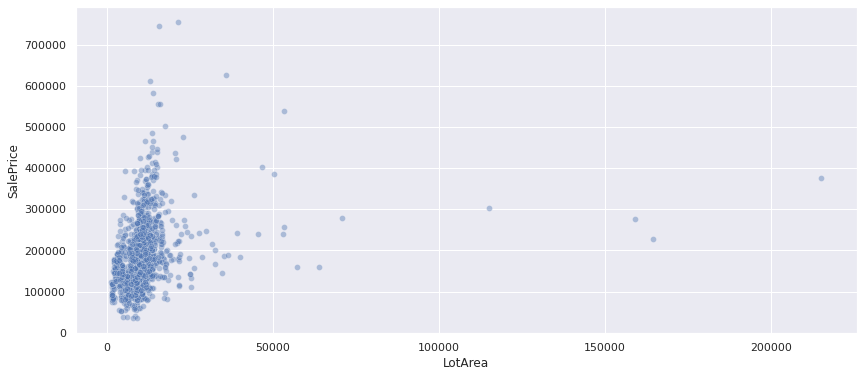

In [158]:
#scatter plot LotArea/saleprice
plt.figure(figsize=(14,6))

feature_area = "LotArea"
target = "SalePrice"


sns.scatterplot(x=train_dataframe[feature_area], y=train_dataframe[target], alpha=0.4) # With alpha we can see where most points tend to group

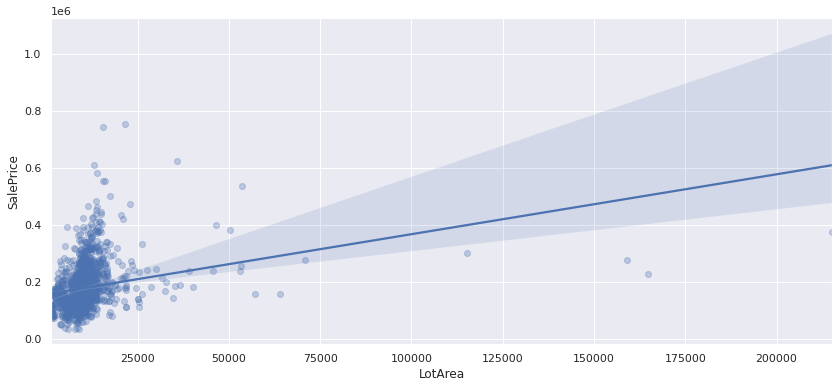

In [159]:
#showing the linear regression
plt.figure(figsize=(14,6))
sns.regplot(x=train_dataframe[feature_area], y=train_dataframe[target], scatter_kws={'alpha':0.3}) # alpha parameter is slightly different in regplot, we use scatter_kws={'alpha':our_value}

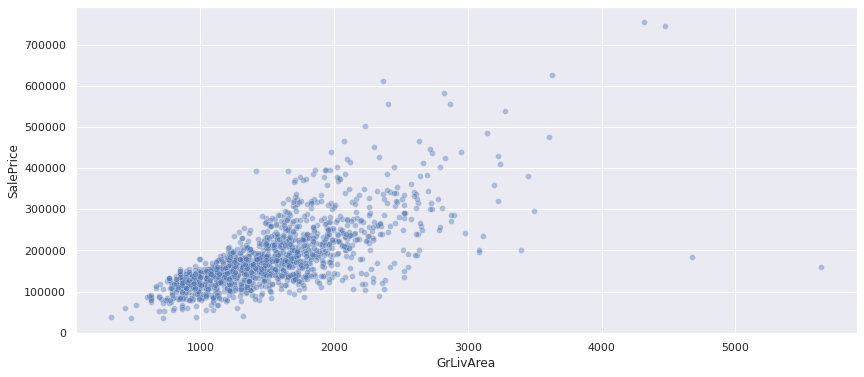

In [160]:
#scatter plot grlivarea/saleprice
plt.figure(figsize=(14,6))

feature_grlivarea = "GrLivArea" # ‘GrLivArea’- This is one of the many area-related parameters available. This one specifically indicates the above ground (grade) living area (in square feet) available in the house.
target = "SalePrice"

sns.scatterplot(x=train_dataframe[feature_grlivarea], y=train_dataframe[target], alpha=0.4)


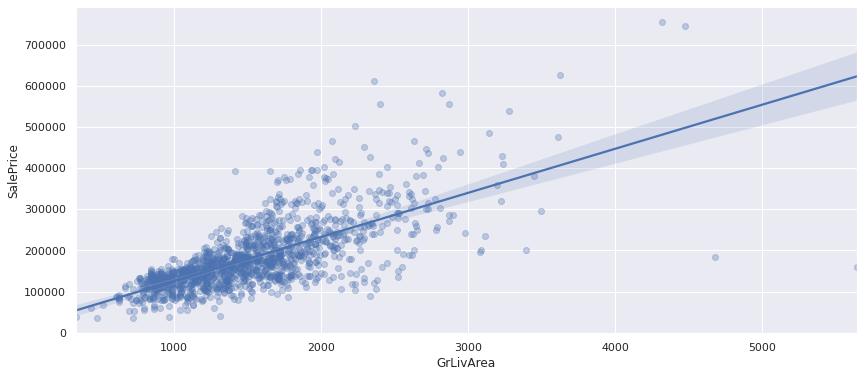

In [161]:
plt.figure(figsize=(14,6))
sns.regplot(x=train_dataframe[feature_grlivarea], y=train_dataframe[target], scatter_kws={'alpha':0.3})

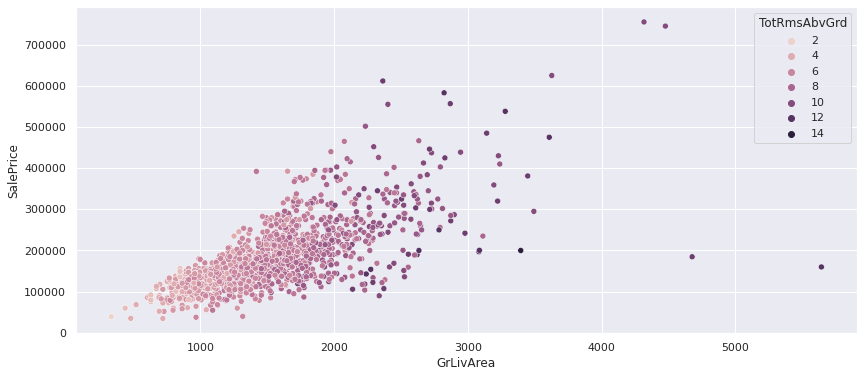

In [162]:
# This relationship between SalePrice and GrLivArea will work perfectly for us to test some more things, like correlations
plt.figure(figsize=(14,6))

sns.scatterplot(x=train_dataframe[feature_grlivarea], y=train_dataframe[target], hue=train_dataframe['TotRmsAbvGrd']) # TotRmsAbvGrd = total no. of non-bathroom rooms above-grade; excludes basement
# In the graph below we can see that buildings with most rooms tend to have greater prices, thus we could be able to get some extra linear regressions to show

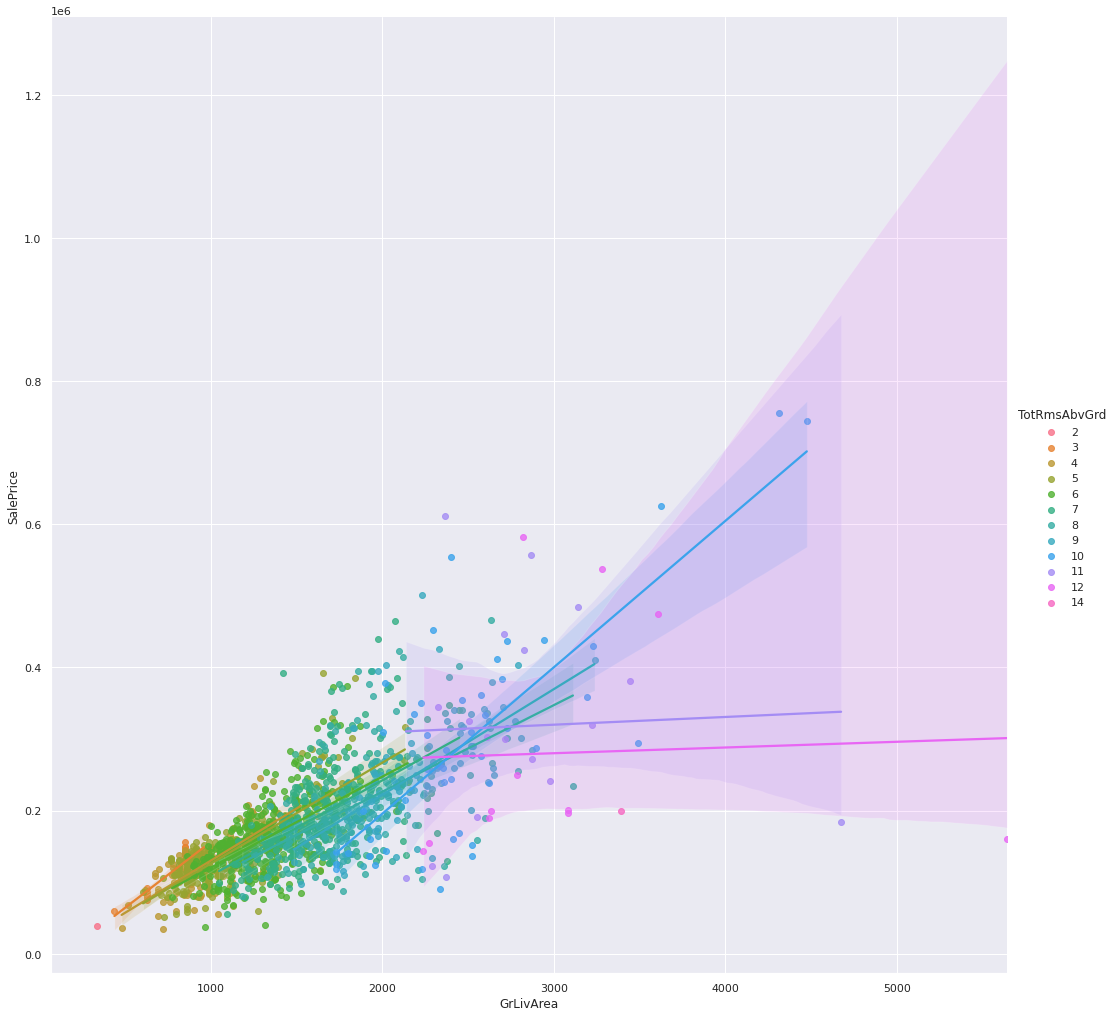

In [163]:

sns.lmplot(x=feature_grlivarea, y=target, hue="TotRmsAbvGrd", data=train_dataframe, size=14)
# I think this would work better if we had boolean features, like pool or not pool / garage or not garage

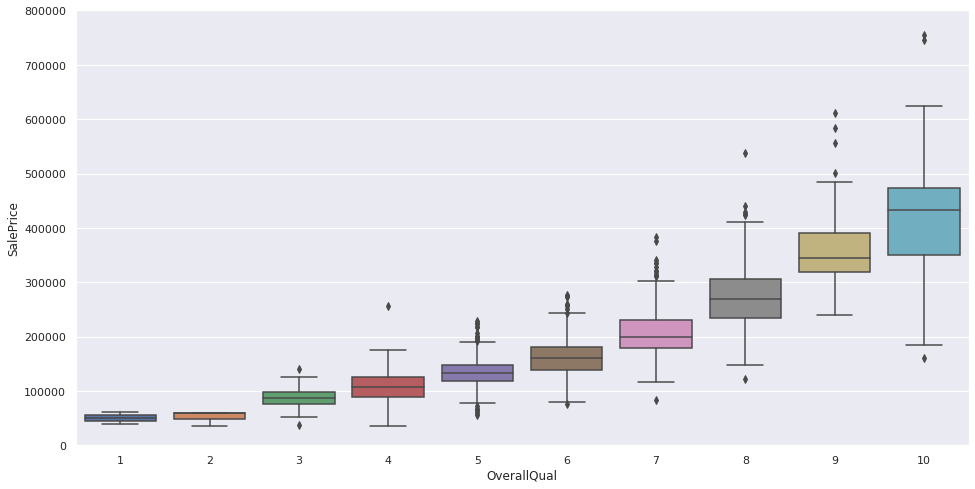

In [164]:
# Relationship with categorical features
# box plot overallqual/saleprice
# A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
# The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
feature_OverallQual = 'OverallQual'
data = pd.concat([train_dataframe['SalePrice'], train_dataframe[feature_OverallQual]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=feature_OverallQual, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000); 

In [165]:
data.head() # we can see that with data DF we created a subDataframe consisting of only 2 series: SalePrice and OverallQual 

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


However, we tried to select which features we thought were more relevant, but what if we have hundreds or thousands of features?
<br></br>
We have a better tool, called **headmap**.



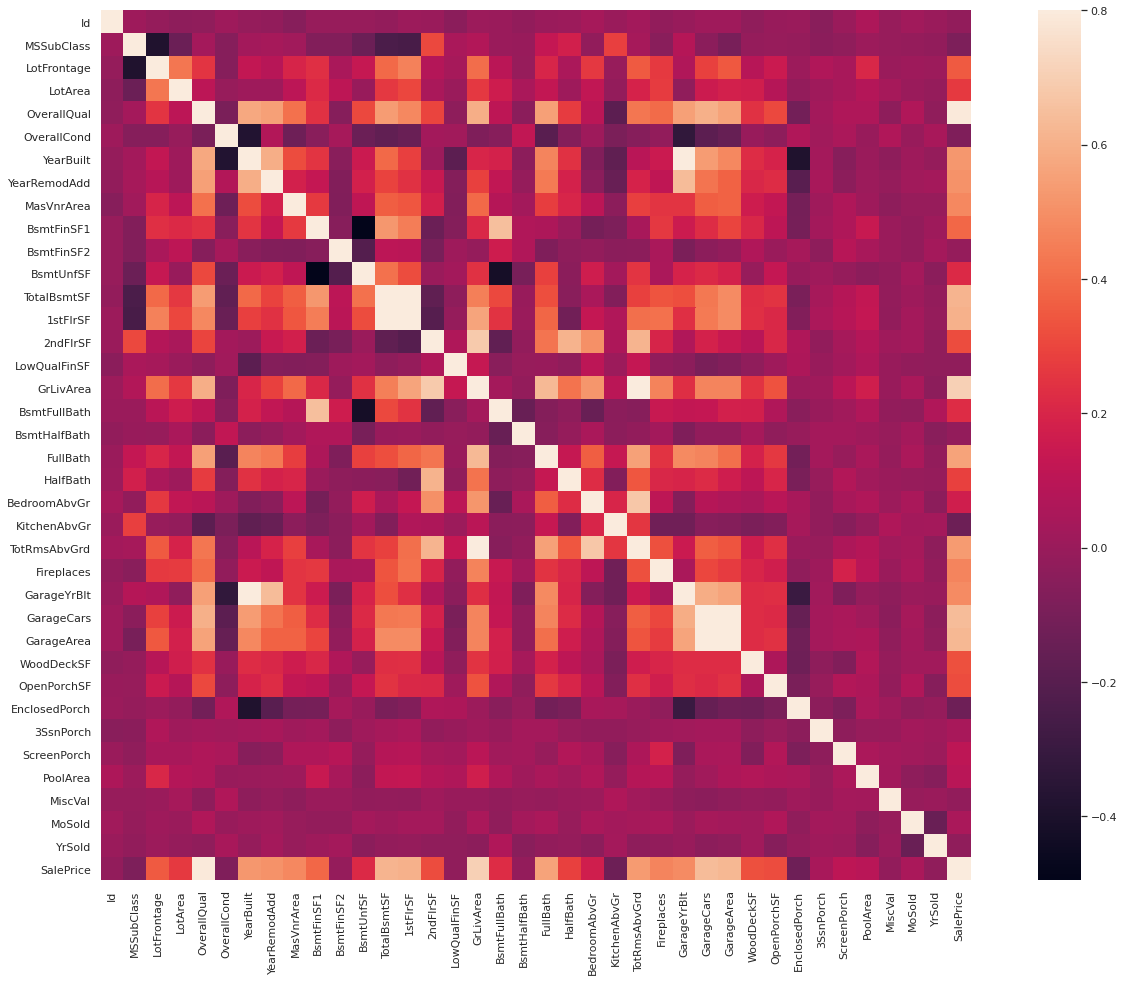

In [166]:
#correlation matrix
corrmat = train_dataframe.corr() # Compute pairwise correlation of columns, excluding NA/null values.
f, ax = plt.subplots(figsize=(24, 16)) # plt.subplots() means Number of rows/columns of the subplot grid.
sns.heatmap(corrmat, vmax=.8, square=True); 
# square=True -> If True, set the Axes aspect to “equal” so each cell will be square-shaped.

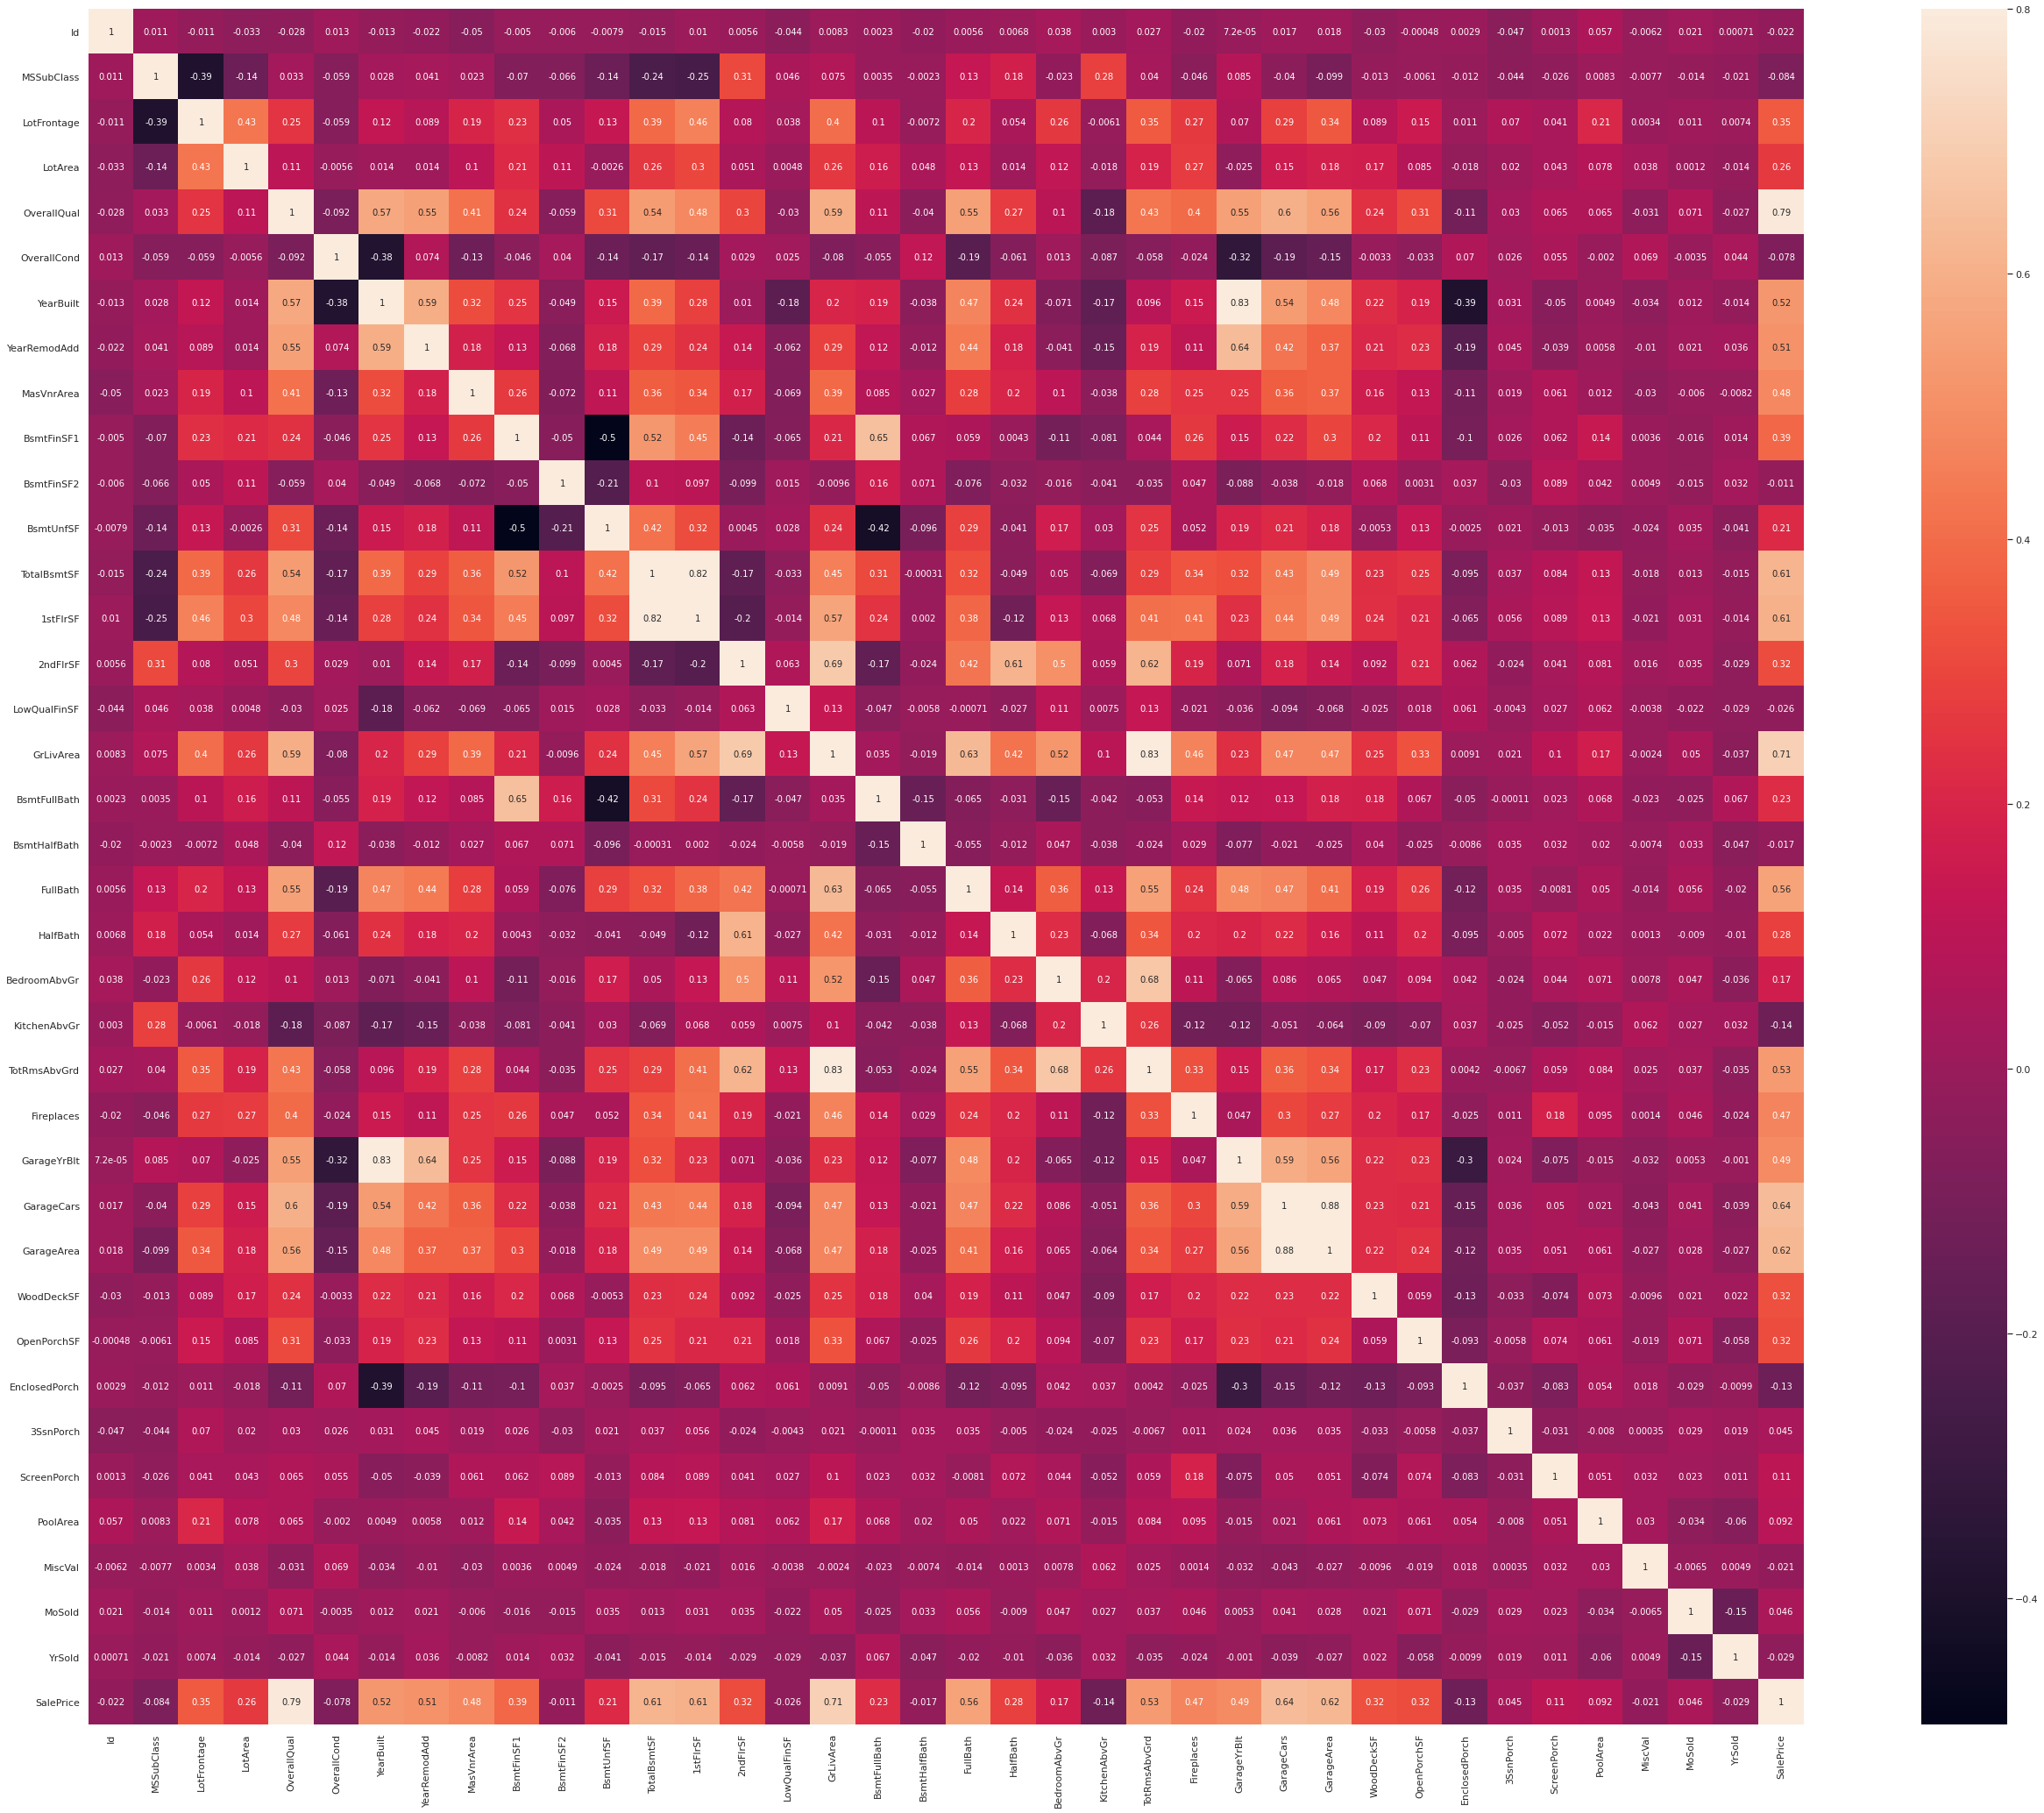

In [167]:
#correlation matrix
corrmat = train_dataframe.corr() # Compute pairwise correlation of columns, excluding NA/null values.
f, ax = plt.subplots(figsize=(48, 36)) # plt.subplots() means Number of rows/columns of the subplot grid.
sns.heatmap(corrmat, vmax=.8, square=True, annot=True); # annot=True -> This ensures that the values for each cell appear on the chart.
# square=True -> If True, set the Axes aspect to “equal” so each cell will be square-shaped.

Cells with ligher hues show better relationships between values, while darker ones show non relevancy. 
<br>The cell that caught most my attention is TotRmsAbvGrd(x axis) and GrLivArea (y axis).
<br>But first, we were interested in the SalePrice, so we have to check that column(or row, whatever) to see what features show better relevance. Note that **Overall Quality, GrLivArea, GarageCars and GarageArea** are the most representative values for getting a more precise **SalePrice** prediction</br>
<br>However, I think we have too much irrelevant data here, so we'll have to shrink it a bit.</br>

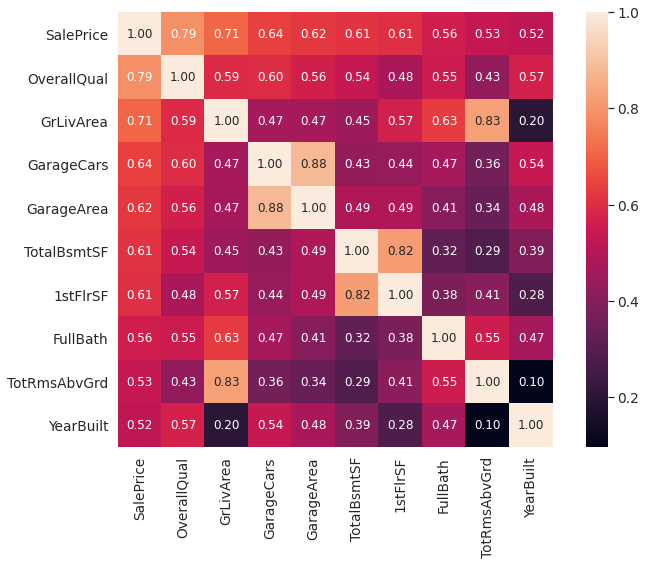

In [168]:
#saleprice correlation matrix
features = 10 #number of variables for heatmap
columns = corrmat.nlargest(features, 'SalePrice')['SalePrice'].index #we select the correlation matrix, and then select the largest values, according to input, output
# df.nlargest() -> Return the first n rows with the largest values in columns, in descending order. 

'''Parameters of nlargest()
nint:  Number of rows to return. ----> in our case, the features
columnslabel or list of labels:  Column label(s) to order by. ---> in our case, SalePrice
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html
'''

cm = np.corrcoef(train_dataframe[columns].values.T) #numpy.corrcoef() -> Return Pearson product-moment correlation coefficients.
# T refers to Transpose matrix -> Transpose index and columns.
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 8)) # this line allows us to change the size of the heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()
# Looking at the SalePrice column(or row, they have the same values) we could train a model using these features or inputs to predict the target or output, in our case the SalePrice

In [169]:
''' # Just ignore this code
mymatrix = np.array([[1, 2], 
                     [3, 4]])
print(mymatrix)
print(np.transpose(mymatrix))
'''

' # Just ignore this code\nmymatrix = np.array([[1, 2], \n                     [3, 4]])\nprint(mymatrix)\nprint(np.transpose(mymatrix))\n'

## Scatter plots between 'SalePrice' and the variables we chose before as features or inputs

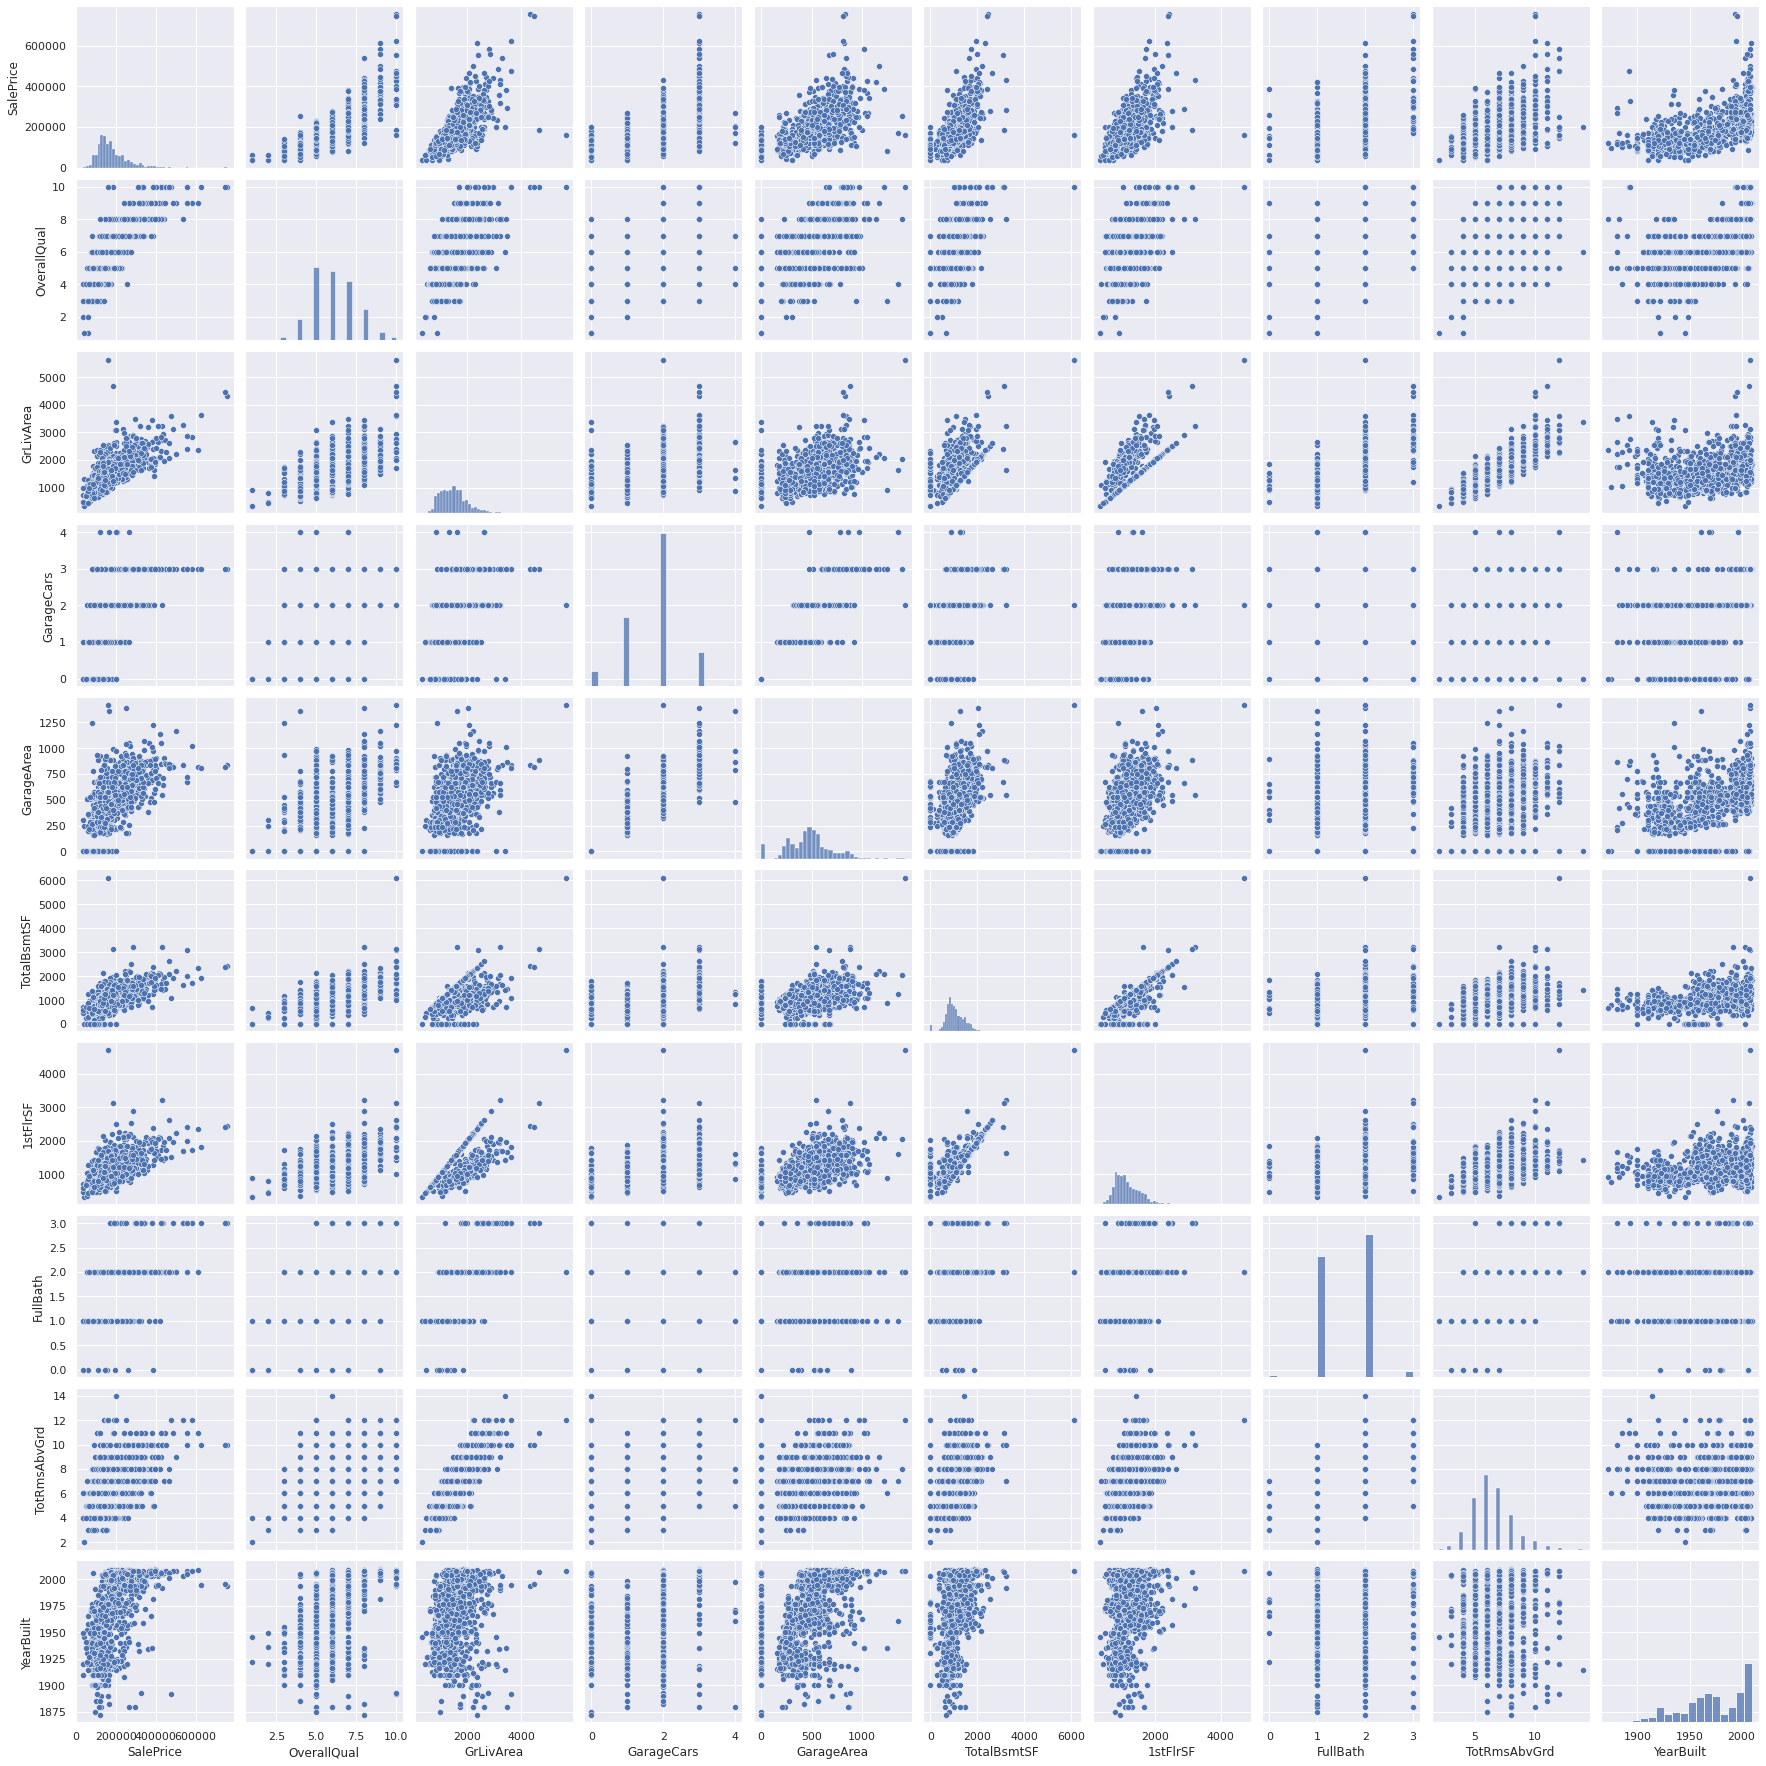

In [170]:
sns.set()
feature_inputs = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train_dataframe[feature_inputs], size = 2.5)
plt.show(); # Plot pairwise relationships in a dataset. https://seaborn.pydata.org/generated/seaborn.pairplot.html
# This resembles to the heatmap, but with a different approach
# We already knew some relationships between the features and the target, but thanks to this we have a better visual approach for each case, instead of trusting the hue of a color, actually.

## Cleaning the data

In [171]:
train_dataframe.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [172]:
# If we check the dataframe, we might encounter null values, which we could drop their rows. But that would mean to drop usefu data too, because if we have like 40 columns, we are discarding the remaining 39 features of the row.
# In short words: missing data can imply a reduction of the sample and this can prevent us from proceeding with the analysis.
# missing data
total = train_dataframe.isnull().sum().sort_values(ascending=False) # Detect missing values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html
# DataFrame.sum() function is used to return the sum of the values for the requested axis by the user. 

percent = (train_dataframe.isnull().sum()/train_dataframe.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [173]:
# We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed.
missing_data.loc[missing_data["Percent"] > 0.15]
# None of the variables below seem to be important, so we'll delete them from our dataframe

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397


In [174]:
#dealing with missing data
train_dataframe = train_dataframe.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_dataframe = train_dataframe.drop(train_dataframe.loc[train_dataframe['Electrical'].isnull()].index)
train_dataframe.isnull().sum().max() #just checking that there's no missing data missing...
# Now we have non null values, because we deleted 19 if the features of our dataframe, the columns that had missing values 

0

In [175]:
# First, we need to clean the test_data too

total_test = testing_dataframe.isnull().sum().sort_values(ascending=False) # Detect missing values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html
# DataFrame.sum() function is used to return the sum of the values for the requested axis by the user. 

percent = (testing_dataframe.isnull().sum()/testing_dataframe.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)


,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [176]:
# I'll do this for the moment
testing_dataframe = testing_dataframe.fillna(0)
testing_dataframe.isnull().sum().max() #just checking that there's no missing data missing...

0

# Linear Regression Time!

In [177]:
# Now that we've analyzed and cleaned the data, it's time to apply some machine learning to our data
from sklearn.linear_model import LinearRegression

In [178]:
print(columns) # We selected the columns before, so we don't have to type them manually. But we have to drop the SalePrice!!

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [179]:
# Selecting the inputs/features
from sklearn.model_selection import train_test_split

features = [input for input in columns if input != 'SalePrice'] # God bless Python comprehension lists!
X = train_dataframe[features]
y = train_dataframe.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(977, 9) (482, 9) (977,) (482,)


In [180]:
X_train.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,6.123849,1524.510747,1.791198,479.094166,1067.364381,1176.010235,1.577277,6.560901,1972.181167
std,1.357287,505.926508,0.732308,208.800397,427.010740,380.164519,0.549232,1.612142,29.831956
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000
25%,5.000000,1144.000000,1.000000,352.000000,802.000000,899.000000,1.000000,5.000000,1955.000000
50%,6.000000,1481.000000,2.000000,482.000000,994.000000,1095.000000,2.000000,6.000000,1974.000000
75%,7.000000,1792.000000,2.000000,576.000000,1309.000000,1414.000000,2.000000,7.000000,2001.000000
max,10.000000,4676.000000,4.000000,1356.000000,3206.000000,3228.000000,3.000000,14.000000,2010.000000


In [181]:
# Creating our model
regression_model = LinearRegression()

In [182]:
# Fitting the model
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
# Predictions
predicted_home_prices = regression_model.predict(X_test)
predicted_home_prices[:5]

array([ 90464.29684109, 327730.02964451,  73577.44753514, 134131.75570527,
       234705.30139149])

In [184]:
print(train_dataframe["SalePrice"][:5]) # Actual values

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [185]:
# Calculating the MAE of our model
from sklearn.metrics import mean_absolute_error

predicted_home_prices = regression_model.predict(X_test)
mae_model_score = mean_absolute_error(y_test, predicted_home_prices)

print("The Mean Absolute Error of our model is " + str(round(mae_model_score, 2))) # round to 2 decimals
print("The Score of our model is " + str(round(regression_model.score(X_test, y_test), 2)))

The Mean Absolute Error of our model is 25156.9
The Score of our model is 0.73


In [186]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(predicted_home_prices.shape)
print(reshaped_predictions.shape)


(977, 9)
(977,)
(482, 9)
(482,)
(482,)
(482, 1)


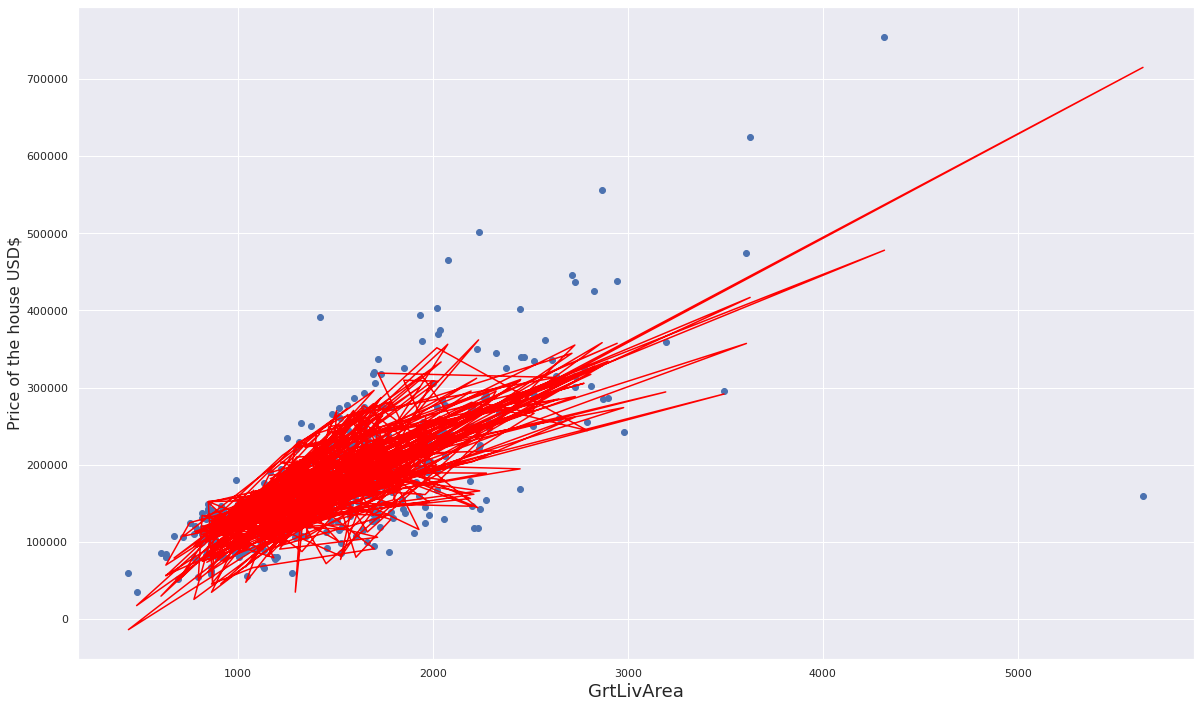

In [187]:
plt.figure(figsize=(20, 12))
plt.xlabel('GrtLivArea', fontsize=18)
plt.ylabel('Price of the house USD$', fontsize=16)
plt.scatter(X_test["GrLivArea"], y_test)
plt.plot(X_test["GrLivArea"], predicted_home_prices, color='red')
plt.show()

Text(0.5, 0, 'SalePrice')

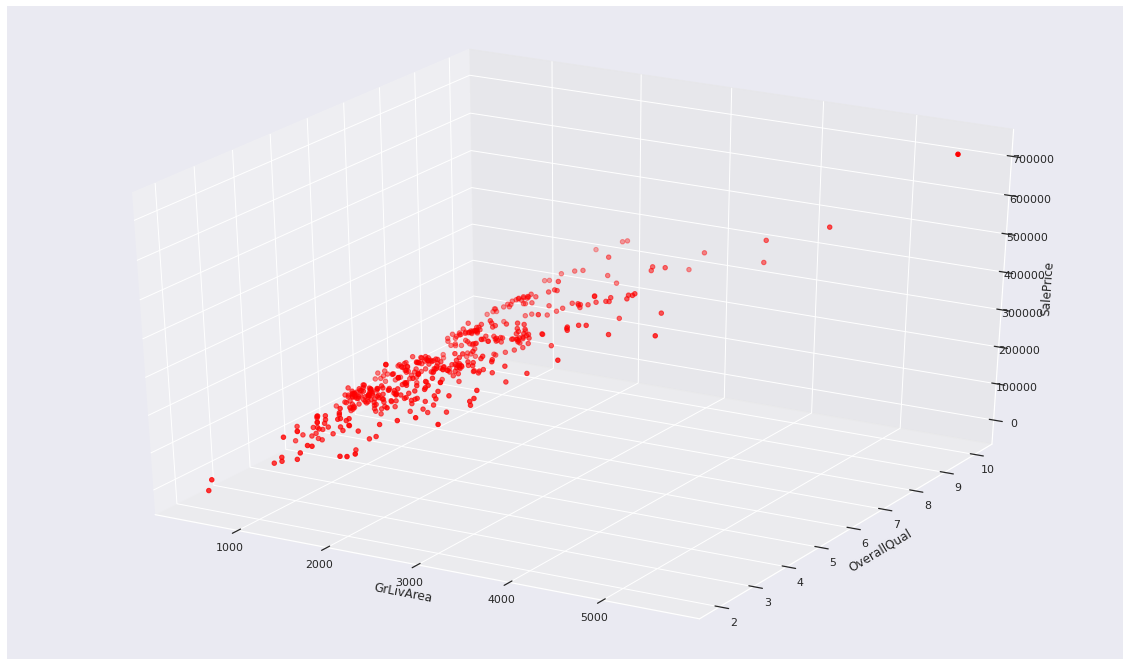

In [188]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = X_test.loc[:, "GrLivArea"], X_test.loc[:, "OverallQual"], predicted_home_prices

# plot the surface
# surf = ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)

# plot the scattered dots
ax.scatter(X, Y, Z, marker='o', color='red')

# Labels
ax.set_xlabel("GrLivArea")
ax.set_ylabel("OverallQual")
ax.set_zlabel("SalePrice")

In [200]:
# https://plotly.com/python/3d-scatter-plots/
import plotly.express as px
fig = px.scatter_3d(train_dataframe, x='GrLivArea', y='OverallQual', z='SalePrice', width=1500, height=1000)
fig.show()


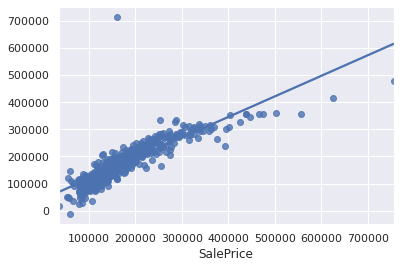

In [190]:
sns.regplot(x=y_test, y=predicted_home_prices, ci=None, color="b")